<a href="https://colab.research.google.com/github/Kevin-2099/Clasificacion-de-tumores-con-Regresion-Logistica/blob/main/Clasificaci%C3%B3n_de_tumores_con_Regresi%C3%B3n_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeras filas del dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  

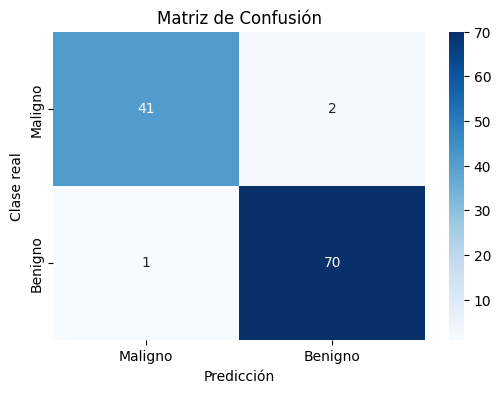


Reporte de clasificación:
              precision    recall  f1-score   support

     Maligno       0.98      0.95      0.96        43
     Benigno       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar dataset
data = load_breast_cancer()

# Crear DataFrame con los datos
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explorar los primeros datos
print("Primeras filas del dataset:")
print(df.head())

# Ver distribución de clases
print("\nDistribución de clases (0 = Maligno, 1 = Benigno):")
print(df['target'].value_counts())

# Separar características y etiquetas
X = df.drop('target', axis=1)
y = df['target']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creación y entrenamiento del modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = model.predict(X_test_scaled)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {accuracy:.4f}")

print("\nMatriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualización de la matriz de confusión
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Maligno", "Benigno"], yticklabels=["Maligno", "Benigno"])
plt.title("Matriz de Confusión")
plt.ylabel("Clase real")
plt.xlabel("Predicción")
plt.show()

# Reporte detallado
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=["Maligno", "Benigno"]))